In [89]:
#######对差异编辑进行分簇可视化后，对基因的表达也做同样的分析，期待有一致/相反的趋势
# 确保载入所需的库
library(tidyr)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(pheatmap)
library(limma)
library(ape)
library(factoextra)
library(gridBase)
library(gridExtra)
library(pheatmap)
library(grid)
#library(ggtree)  #聚类
#library(aplot) 


Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [1]:
.libPaths('/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library')

In [3]:
#########PFC样本ADAR家族表达情况
expression_08 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884059_GW8_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884066_GW12_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_16_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884070_GW16_PFC1_3.UMI_TPM_no_ERCC.txt",header=T)
expression_16_4 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884071_GW16_PFC1_4.UMI_TPM_no_ERCC.txt",header=T)
expression_16_9 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884076_GW16_PFC1_9.UMI_TPM_no_ERCC.txt",header=T)
expression_19_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884077_GW19_PFC1.UMI_TPM_no_ERCC.txt",header=T)
expression_19_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884078_GW19_PFC2.UMI_TPM_no_ERCC.txt",header=T)
expression_19_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884079_GW19_PFC3.UMI_TPM_no_ERCC.txt",header=T)
expression_23_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884080_GW23_PFC1_1.UMI_TPM_no_ERCC.txt",header=T)
expression_23_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884081_GW23_PFC1_2.UMI_TPM_no_ERCC.txt",header=T)
expression_23_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884082_GW23_PFC1_3.UMI_TPM_no_ERCC.txt",header=T)
expression_26_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/20240425_useful_matrix/GSM2884084_GW26_PFC1_1.UMI_TPM_no_ERCC.txt",header=T)

In [4]:
rownames(expression_08) <- expression_08$Gene
expression_08 <- expression_08[,-1]
rownames(expression_12) <- expression_12$Gene
expression_12 <- expression_12[,-1]
rownames(expression_16_3) <- expression_16_3$Gene
expression_16_3 <- expression_16_3[,-1]
rownames(expression_16_4) <- expression_16_4$Gene
expression_16_4 <- expression_16_4[,-1]
rownames(expression_16_9) <- expression_16_9$Gene
expression_16_9 <- expression_16_9[,-1]
rownames(expression_19_1) <- expression_19_1$Gene
expression_19_1 <- expression_19_1[,-1]
rownames(expression_19_2) <- expression_19_2$Gene
expression_19_2 <- expression_19_2[,-1]
rownames(expression_19_3) <- expression_19_3$Gene
expression_19_3 <- expression_19_3[,-1]
rownames(expression_23_1) <- expression_23_1$Gene
expression_23_1 <- expression_23_1[,-1]
rownames(expression_23_2) <- expression_23_2$Gene
expression_23_2 <- expression_23_2[,-1]
rownames(expression_23_3) <- expression_23_3$Gene
expression_23_3 <- expression_23_3[,-1]
rownames(expression_26_1) <- expression_26_1$Gene
expression_26_1 <- expression_26_1[,-1]

In [5]:
###按细胞类型对表达数据分组
GABA_cellTag_08 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW08/GABAergic_neurons_cellTag.txt")[,1]
expression_08_GABA <- expression_08[,GABA_cellTag_08]
GABA_cellTag_12 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW12/GABAergic_neurons_cellTag.txt")[,1]
expression_12_GABA <- expression_12[,GABA_cellTag_12]
GABA_cellTag_16_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_16_3_GABA <- expression_16_3[,GABA_cellTag_16_3]
GABA_cellTag_16_4 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_4/GABAergic_neurons_cellTag.txt")[,1]
expression_16_4_GABA <- expression_16_4[,GABA_cellTag_16_4]
GABA_cellTag_16_9 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW16_1_9/GABAergic_neurons_cellTag.txt")[,1]
expression_16_9_GABA <- expression_16_9[,GABA_cellTag_16_9]
GABA_cellTag_19_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_19_1_GABA <- expression_19_1[,GABA_cellTag_19_1]
GABA_cellTag_19_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_2/GABAergic_neurons_cellTag.txt")[,1]
expression_19_2_GABA <- expression_19_2[,GABA_cellTag_19_2]
GABA_cellTag_19_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW19_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_19_3_GABA <- expression_19_3[,GABA_cellTag_19_3]
GABA_cellTag_23_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_23_1_GABA <- expression_23_1[,GABA_cellTag_23_1]
GABA_cellTag_23_2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_2/GABAergic_neurons_cellTag.txt")[,1]
expression_23_2_GABA <- expression_23_2[,GABA_cellTag_23_2]
GABA_cellTag_23_3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW23_1_3/GABAergic_neurons_cellTag.txt")[,1]
expression_23_3_GABA <- expression_23_3[,GABA_cellTag_23_3]
GABA_cellTag_26_1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/cellTag_info/GW26_1_1/GABAergic_neurons_cellTag.txt")[,1]
expression_26_1_GABA <- expression_26_1[,GABA_cellTag_26_1]

In [6]:
avg_gene_expr_08 <- rowSums(expression_08_GABA)/rowSums(expression_08_GABA!=0)
avg_gene_expr_08[is.na(avg_gene_expr_08)] <- 0
avg_gene_expr_12 <- rowSums(expression_12_GABA)/rowSums(expression_12_GABA!=0)
avg_gene_expr_12[is.na(avg_gene_expr_12)] <- 0
avg_gene_expr_16_3 <- rowSums(expression_16_3_GABA)/rowSums(expression_16_3_GABA!=0)
avg_gene_expr_16_3[is.na(avg_gene_expr_16_3)] <- 0
avg_gene_expr_16_4 <- rowSums(expression_16_4_GABA)/rowSums(expression_16_4_GABA!=0)
avg_gene_expr_16_4[is.na(avg_gene_expr_16_4)] <- 0
avg_gene_expr_16_9 <- rowSums(expression_16_9_GABA)/rowSums(expression_16_9_GABA!=0)
avg_gene_expr_16_9[is.na(avg_gene_expr_16_9)] <- 0
avg_gene_expr_19_1 <- rowSums(expression_19_1_GABA)/rowSums(expression_19_1_GABA!=0)
avg_gene_expr_19_1[is.na(avg_gene_expr_19_1)] <- 0
avg_gene_expr_19_2 <- rowSums(expression_19_2_GABA)/rowSums(expression_19_2_GABA!=0)
avg_gene_expr_19_2[is.na(avg_gene_expr_19_2)] <- 0
avg_gene_expr_19_3 <- rowSums(expression_19_3_GABA)/rowSums(expression_19_3_GABA!=0)
avg_gene_expr_19_3[is.na(avg_gene_expr_19_3)] <- 0
avg_gene_expr_23_1 <- rowSums(expression_23_1_GABA)/rowSums(expression_23_1_GABA!=0)
avg_gene_expr_23_1[is.na(avg_gene_expr_23_1)] <- 0
avg_gene_expr_23_2 <- rowSums(expression_23_2_GABA)/rowSums(expression_23_2_GABA!=0)
avg_gene_expr_23_2[is.na(avg_gene_expr_23_2)] <- 0
avg_gene_expr_23_3 <- rowSums(expression_23_3_GABA)/rowSums(expression_23_3_GABA!=0)
avg_gene_expr_23_3[is.na(avg_gene_expr_23_3)] <- 0
avg_gene_expr_26_1 <- rowSums(expression_26_1_GABA)/rowSums(expression_26_1_GABA!=0)
avg_gene_expr_26_1[is.na(avg_gene_expr_26_1)] <- 0

In [7]:
avg_expr_all_phases <- as.data.frame(cbind(avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,
                                            avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,
                                            avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1))
head(avg_expr_all_phases)

,avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0.000000,0.00,686.325,2.9900,286.69,0.00,160.93,0.00,695.73,36.965,77.3020
A1BG-AS1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.0000
A1CF,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,5.58,0.000,0.0000
A2M,0,8.996667,7.97,49.400,30.6075,147.43,5.72,0.00,9.73,0.00,0.000,233.0325
A2M-AS1,0,0.000000,0.00,0.000,65.4100,0.00,0.00,0.00,0.00,0.00,0.000,4.8200
A2ML1,0,0.000000,0.00,0.000,0.0000,0.00,0.00,0.00,0.00,0.00,14.200,38.1200


In [8]:
avg_expr_all_phases <- avg_expr_all_phases[which(rowSums(avg_expr_all_phases)!=0),]

[1] 73 12

,avg_gene_expr_08,avg_gene_expr_12,avg_gene_expr_16_3,avg_gene_expr_16_4,avg_gene_expr_16_9,avg_gene_expr_19_1,avg_gene_expr_19_2,avg_gene_expr_19_3,avg_gene_expr_23_1,avg_gene_expr_23_2,avg_gene_expr_23_3,avg_gene_expr_26_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABI2,275.775,691.195,148.6975,189.7183,368.9780,295.0267,41.720,184.4900,412.4000,198.5227,410.8520,442.0342
AGAP9,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,1.7100
BICD1,47.370,331.425,116.4250,1520.6500,169.5267,46.3500,16.730,319.9850,332.7650,493.0900,377.2467,537.4209
BNIP3L,189.440,395.880,146.7544,261.6871,278.8533,276.1767,202.234,238.3025,479.4847,500.0542,452.3414,395.1400
BRINP3,236.870,0.000,68.3900,14.4150,3.0000,52.1900,12.450,0.0000,5.6400,0.0000,0.0000,145.5300
CCDC148,0.000,0.000,0.0000,0.0000,10.3000,0.0000,0.000,16.0400,469.2700,0.0000,609.6600,107.3200


,stages
,<chr>
GW08,week8
GW12,week12
GW16_1_3,week16
GW16_1_4,week16
GW16_1_9,week16
GW19_1_1,week19
GW19_1_2,week19
GW19_1_3,week19
GW23_1_1,week23


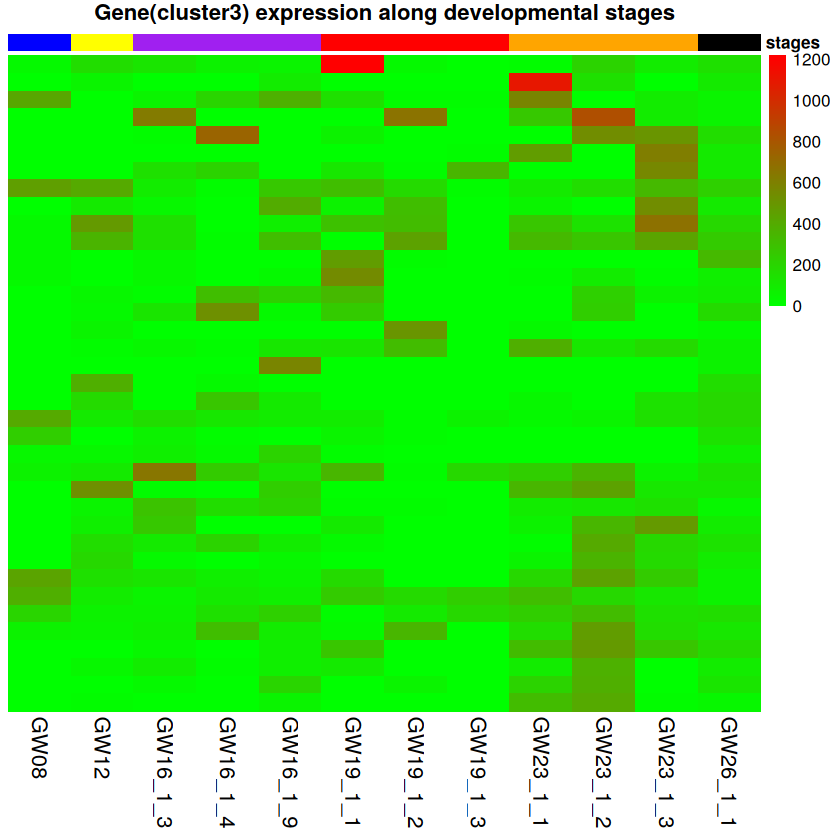

In [104]:
genes_cluster <- read.table('/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_editing/GABAergic_neurons/genes_de_edited_sites_cluster3.txt')[,1]
gene_cluster_expr <- avg_expr_all_phases[rownames(avg_expr_all_phases) %in% genes_cluster,]
dim(gene_cluster_expr)
########同一簇内的基因表达,用热图可视化
head(gene_cluster_expr)
####矩阵的值差距太大，大部份为0，影响热图呈现
##保留rowsums处于25%-75%之间的基因
min_flag <- quantile(rowSums(gene_cluster_expr))[2]
max_flag <- quantile(rowSums(gene_cluster_expr))[4]
sub_gene_cluster_expr <- gene_cluster_expr[which(rowSums(gene_cluster_expr) >= min_flag & rowSums(gene_cluster_expr) <= max_flag),]
colnames(sub_gene_cluster_expr) <- c('GW08','GW12','GW16_1_3','GW16_1_4','GW16_1_9','GW19_1_1','GW19_1_2','GW19_1_3','GW23_1_1','GW23_1_2','GW23_1_3','GW26_1_1')
my_palette <- colorRampPalette(c("green", "red"))(n = 100)  # 创建自定义颜色梯度，100级颜色 
annotation_col = data.frame(
  stages = c('week8','week12',rep('week16',3),rep('week19',3),rep('week23',3),'week26')
  #color = c('blue','yellow',rep('purple',3),rep('red',3),rep('orange',3),'black')
)
rownames(annotation_col) = colnames(sub_gene_cluster_expr)
annotation_col
color_mapping <- list(stages=c(week8 = "blue", week12 = "yellow", week16 = "purple", week19 = 'red', week23 = 'orange', week26 = 'black')) 
#pdf("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_editing/de_edited_sites.pdf")
pheatmap_cluster3 <- pheatmap(sub_gene_cluster_expr,
         cluster_cols = FALSE,
         cluster_rows = TRUE,
         show_colnames = TRUE,
         show_rownames = FALSE,
         #cellheight = 0.5,
         color = my_palette,
         #fontsize_row = 6,          # 行标签字体大小
         fontsize_col = 13,          # 列标签字体大小
         border_color = NA,    # 边框颜色
         #cell_border_color = "none", # 单元格边框颜色
         #alpha = 0.8,             # 颜色透明度
         treeheight_row = 0,
         annotation_col = annotation_col,
         annotation_colors =  color_mapping,
         annotation_legend = FALSE, 
         annotation_names_col = TRUE,# 添加列注释
         main = "Gene(cluster3) expression along developmental stages",
         #main = "Customized Heatmap", # 图表标题
         #legend_breaks = seq(min(de_data), max(de_data), length.out = 5), # 图例刻度
         legend_labels = '' # 图例标签
)
#dev.off()
#mtext("My X-axis Label", side = 1, line = 2.5, cex = 1.2) 

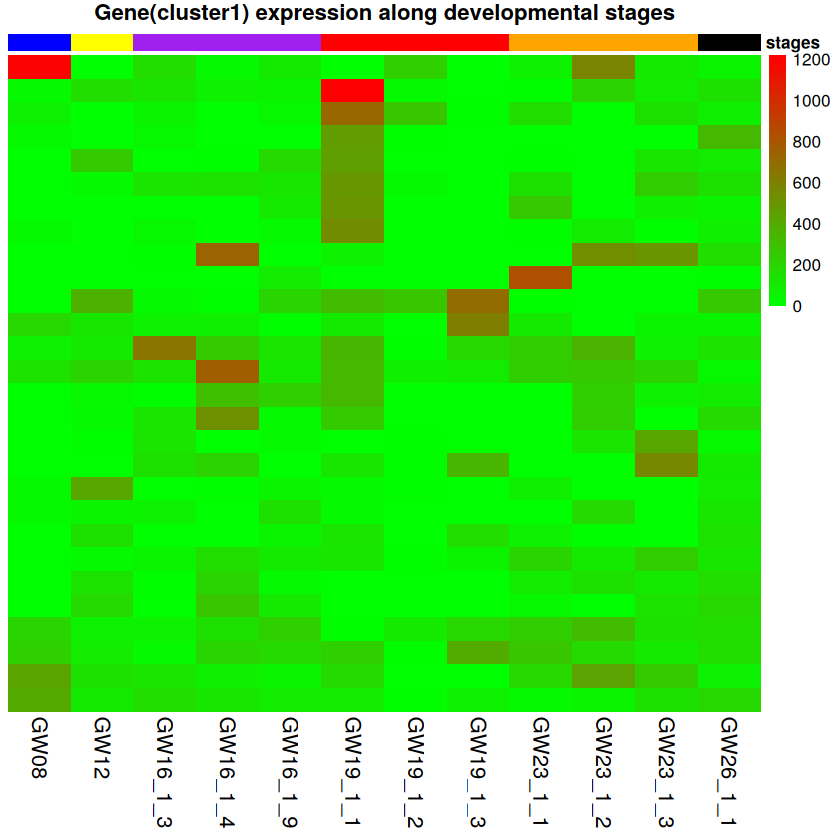

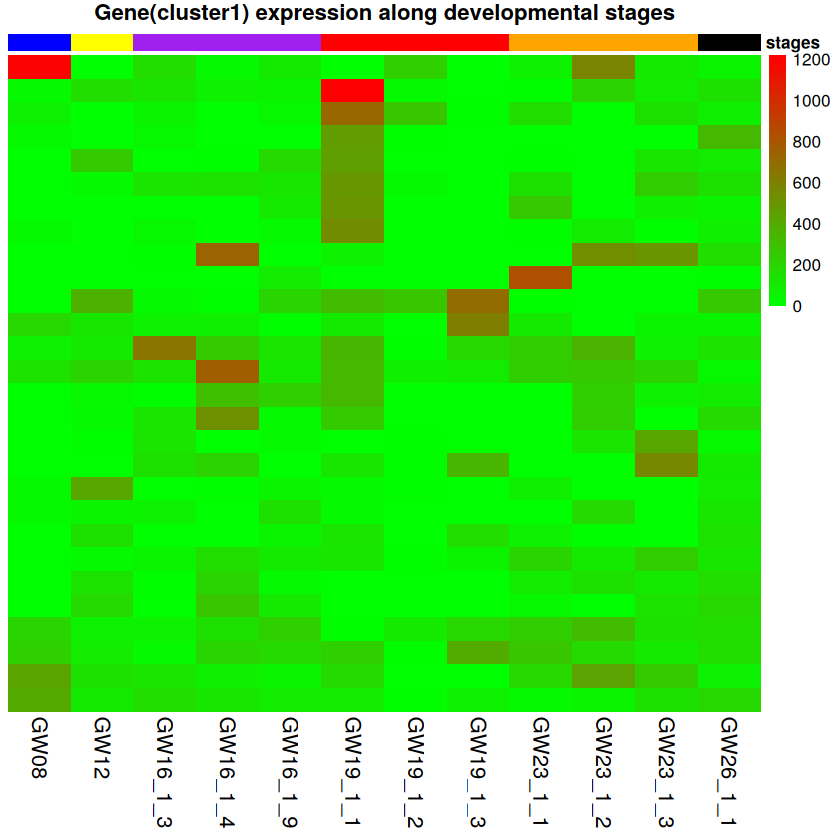

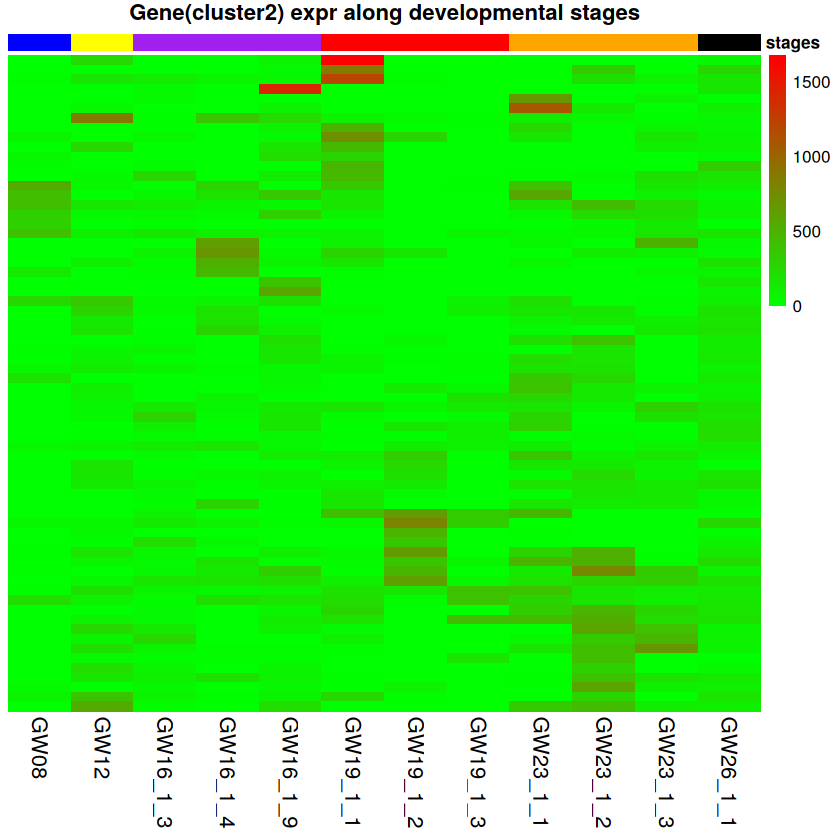

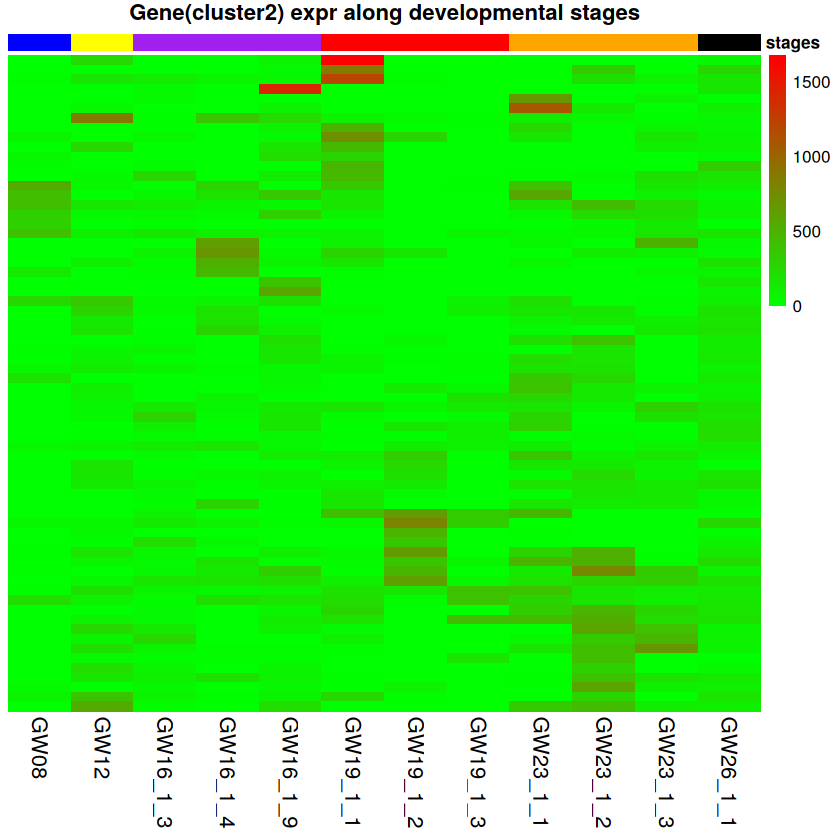

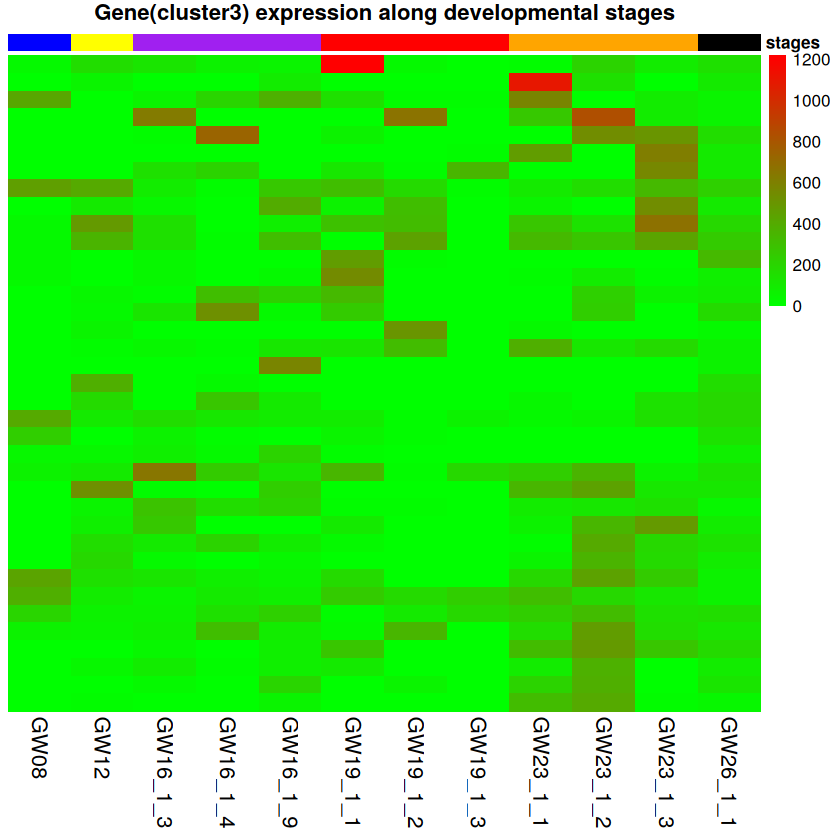

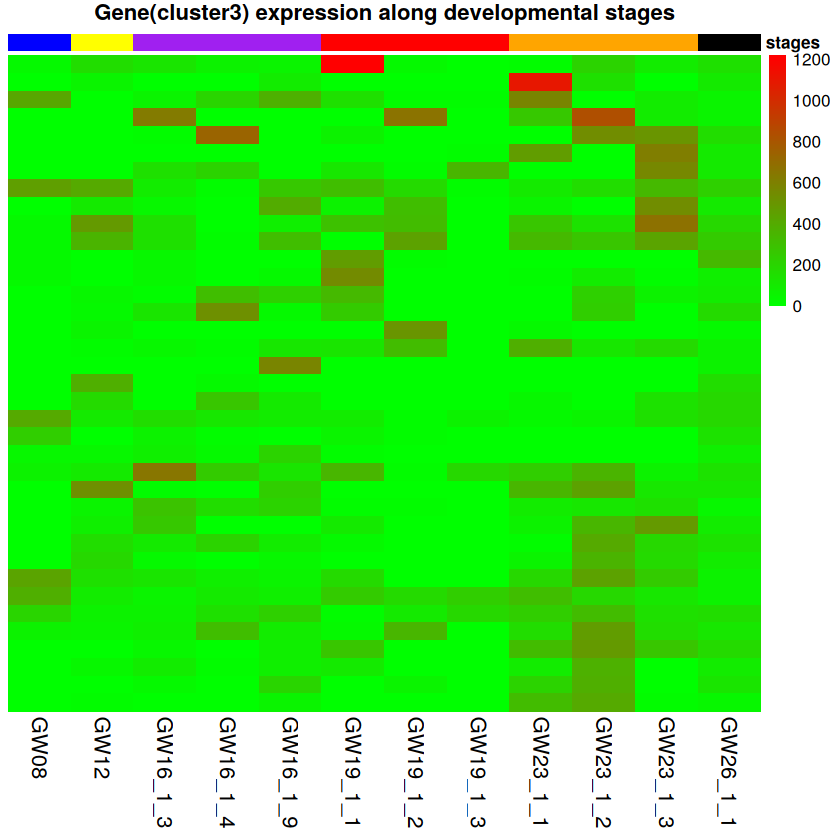

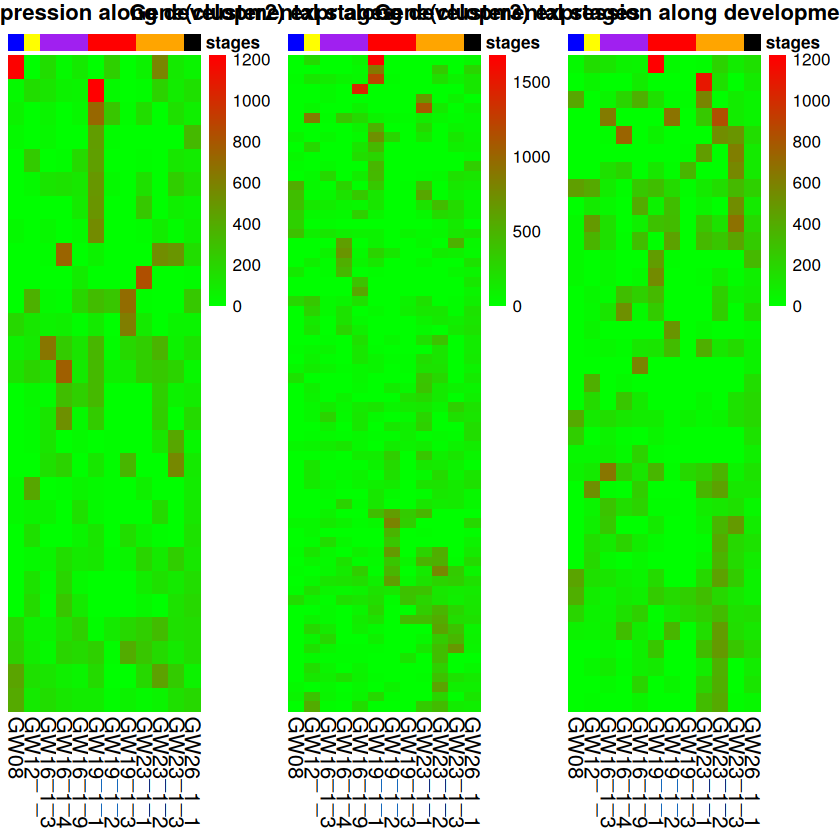

In [107]:
# 创建一个新的图形设备以便捕获
grid.newpage()
pushViewport(viewport())
# 绘制第一个热图并捕获
print(pheatmap_cluster1)
grob_1 <- grid.grab()

# 清除当前图形并绘制第二个热图
grid.newpage()
pushViewport(viewport())
print(pheatmap_cluster2)
grob_2 <- grid.grab()

grid.newpage()
pushViewport(viewport())
print(pheatmap_cluster3)
grob_3 <- grid.grab()

# 组合热图
combined_heatmap <- grid.arrange(grob_1,grob_2,grob_3,ncol = 3)
ggsave("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/de_editing/GABAergic_neurons/3_clusters_gene_expr.png", combined_heatmap, dpi = 300, width = 20,height = 8)
# 或者使用gridExtra的保存方法，如果适用